In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
x_data = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_data = data[['quality']] - 3

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=1)

In [5]:
def report(y, pred):
    print(classification_report(y, pred))
    ConfusionMatrixDisplay.from_predictions(y, pred)

## Decision Tree

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.15      0.19        13
           2       0.67      0.72      0.69       140
           3       0.66      0.60      0.63       134
           4       0.45      0.57      0.50        30
           5       1.00      0.50      0.67         2

    accuracy                           0.63       320
   macro avg       0.50      0.42      0.45       320
weighted avg       0.63      0.63      0.63       320



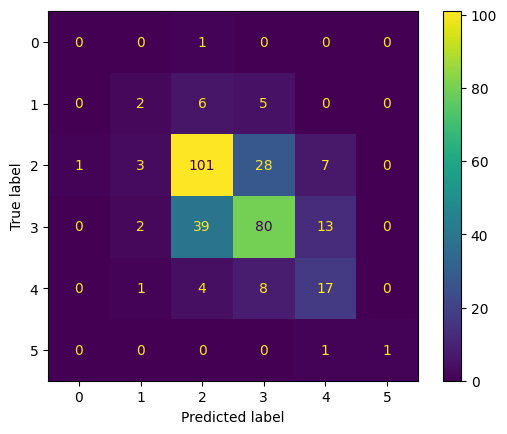

In [8]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
report(y_test, pred)

## SVM

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        13
           2       0.62      0.78      0.69       140
           3       0.57      0.61      0.59       134
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00         2

    accuracy                           0.60       320
   macro avg       0.20      0.23      0.21       320
weighted avg       0.51      0.60      0.55       320



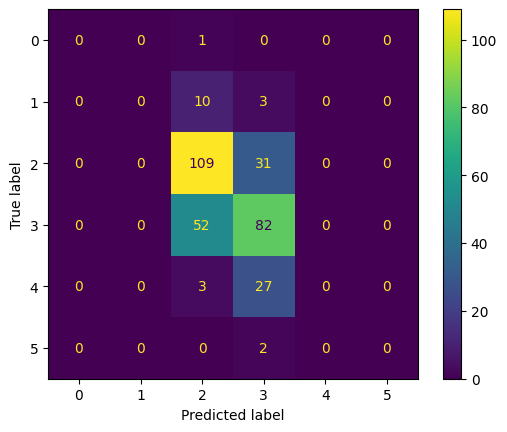

In [9]:
model = SVC(kernel='linear')  # Linear Kernel
model.fit(x_train, y_train)
pred = model.predict(x_test)
report(y_test, pred)

## KNeighborsClassifier

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        13
           2       0.55      0.68      0.61       140
           3       0.49      0.44      0.46       134
           4       0.28      0.23      0.25        30
           5       0.00      0.00      0.00         2

    accuracy                           0.50       320
   macro avg       0.22      0.23      0.22       320
weighted avg       0.47      0.50      0.48       320



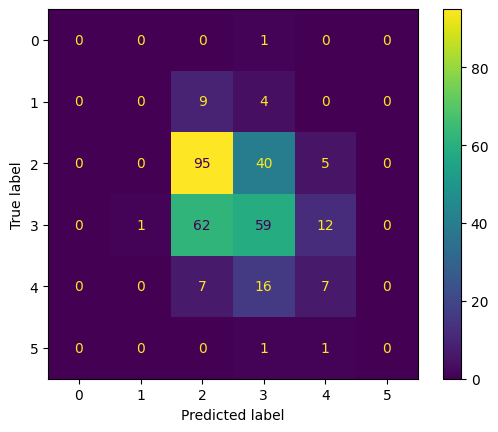

In [10]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
report(y_test, pred)

## GaussianNB

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        13
           2       0.66      0.72      0.69       140
           3       0.61      0.45      0.52       134
           4       0.33      0.63      0.44        30
           5       0.00      0.00      0.00         2

    accuracy                           0.56       320
   macro avg       0.27      0.30      0.27       320
weighted avg       0.58      0.56      0.56       320



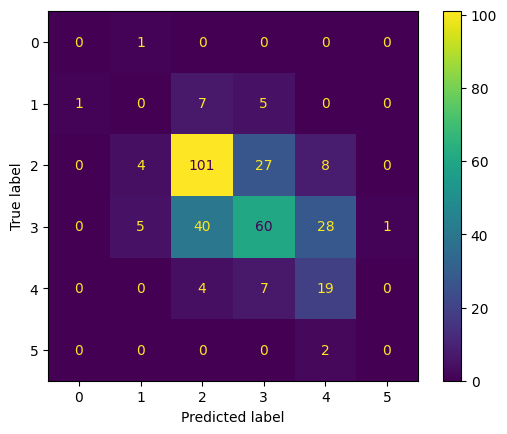

In [21]:
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
report(y_test, pred)

## LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: P

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        13
           2       0.65      0.76      0.70       140
           3       0.58      0.66      0.61       134
           4       0.50      0.03      0.06        30
           5       0.00      0.00      0.00         2

    accuracy                           0.61       320
   macro avg       0.29      0.24      0.23       320
weighted avg       0.57      0.61      0.57       320



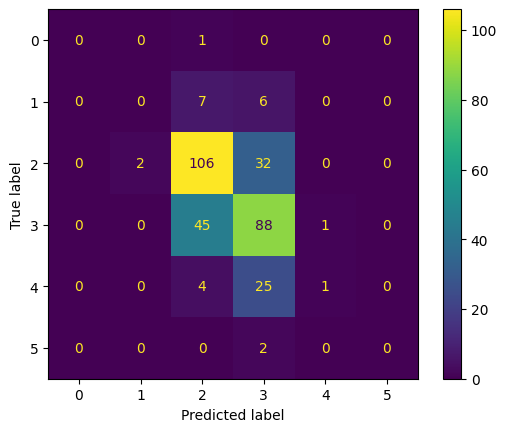

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
report(y_test, pred)